## Лекция 9. Двухчастичные системы
---

Волновая функция $\Psi(\vec{\textbf{r}}, t)$ в случае двух частичной задачи начнает зависеть от координат обеих частиц $$\Psi(\vec{\textbf{r}}, t) = \Psi(\textbf{r}_1, \textbf{r}_2, t)$$
Эволюция система по-прежнему описывается уравнением Шредингера:
$$i \hbar \frac{\partial \Psi}{\partial t} = H \Psi,$$

где Гамильтониан полной системы 

$$H = -\frac{\hbar^2}{2m_1} \nabla^2_1 -\frac{\hbar^2}{2m_2} \nabla^2_2 + V(\textbf{r}_1, \textbf{r}_2, t)$$

Условие нормировки не изменилось:
$$\int |\Psi(\textbf{r}_1, \textbf{r}_2, t) |^2 d^3\textbf{r}_1d^3\textbf{r}_2 = 1,$$
а подынтегальное выражение определяет вероятность обнаружить частицы 1 и 2 в объемах $d^3\textbf{r}_1, d^3\textbf{r}_2$ соответственно.
Если потенциал не зависит от времени 

$$\Psi(\textbf{r}_1, \textbf{r}_2, t) = \psi(\textbf{r}_1, \textbf{r}_2) e^{-i\frac{Et}{\hbar}},$$

тогда в наиболее общем УШ примет следующий вид:

$$-\frac{\hbar^2}{2m_1} \nabla^2_1 \psi -\frac{\hbar^2}{2m_2} \nabla^2_2 \psi + V \psi = E \psi$$

### Два осциллятора

В качестве примера двухчастичной задачи рассмотрим два одномерных осциллятора $x \in [-a, a)$ с $\Delta x = 0.05$ , $a = 4$ $(N = 160)$. Гамильтониан такой системы имеет вид:

$$H = \frac{p_1^2 + p_2^2}{2m} + \frac{1}{2}k(x_1^2 +x_2^2) = -\frac{\hbar^2}{2m} \left( \frac{\partial^2}{\partial x_1^2} - \frac{\partial^2}{\partial x_2^2} \right) + \frac{1}{2}k(x_1^2 +x_2^2),$$

и  само УШ соответсвенно
$$-\frac{\hbar^2}{2m} \left( \frac{\partial^2}{\partial x_1^2} - \frac{\partial^2}{\partial x_2^2} \right) \psi(x_1, x_2) + \frac{1}{2}k(x_1^2 +x_2^2) \psi(x_1, x_2) = E \psi(x_1, x_2) $$

Как было показано на прошлой лекции, для того чтобы решить стационарное УШ численно необходимо дискретизировать конфигурационное пространство, получить матрицу $\hat{H}$ в каком-либо базисе и диагонализовать ее, тем самым получив коэффициенты разложения собственной функции $\hat{C}$ и энергии $\hat{E}$.

Поэтому сначала выберем двух частичных базис в виде:
$$\phi(x_1, x_2) = \delta(x_1 - x_i) \cdot \delta(x_2 - x_j),$$

тогда разложение собственной функции $\phi(x_1, x_2)$ по базисным векторам будет выглядеть так:
$$\psi(x_1, x_2) = \sum_{i, j}\phi(x_{i}, x_{j}) \psi(x_1, x_2) = \sum_{i, j}\delta(x_1 - x_i)\cdot \delta(x_2 - x_j) \psi(x_1, x_2)$$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
a = 4
dx = 0.2
x = np.arange(-a, a, dx)
N = x.size

In [3]:
phi =np.zeros((N**2, 2*N))
for i in range(N):
    for j in range(N):
        phi[i*N +j, i] = 1
        phi[i*N +j, j + N] = 1

Теперь нам необходимо составить матрицу Гамильтониана H в выбранном нами базисе, для этого необходимо рассчитать матричные элементы от каждого из слагаемых

Кинетическая часть:



\begin{align}
    H_{mn}^{kin} &= -\frac{\hbar^2}{2m}\sum_{i, j = 0}^{N-1} \phi_m(x_i, x_j) \frac{\partial^2}{\partial x_1^2}\phi_n(x_i, x_j)  - \frac{\hbar^2}{2m} \sum_{i, j = 0}^{N-1} \phi_m(x_i, x_j) \frac{\partial^2}{\partial x_2^2} \phi_n(x_i, x_j) = \\
           &= - \frac{\hbar^2}{2m} \sum_{i, j = 0}^{N-1}  \delta(x_2 - x_{jm}) \cdot\delta(x_1 - x_{im}) \frac{\partial^2}{\partial x_1^2} \delta(x_1 - x_{in})\cdot \delta(x_2 - x_{jn}) - \\
           &- \frac{\hbar^2}{2m} \sum_{i, j = 0}^{N-1} \delta(x_1 - x_{im})\cdot \delta(x_2 - x_{jm}) \frac{\partial^2}{\partial x_2^2} \delta(x_2 - x_{jn}) \cdot \delta(x_1 - x_{in})
\end{align}


Потенциальная часть:
\begin{align}
    H_{mn}^{potential} &= \sum_{i, j = 0}^{N-1} \phi_m(x_i, x_j) \frac{1}{2}k(x_1^2 +x_2^2) \phi_n(x_i, x_j) = \\
           &=  \sum_{i, j = 0}^{N-1}   \delta(x_1 - x_{im}) \delta(x_2 - x_{jm}) \frac{1}{2}kx_1^2 \cdot \delta(x_1 - x_{in}) \delta(x_2 - x_{jn}) + \\
           &+  \sum_{i, j = 0}^{N-1}   \delta(x_1 - x_{im}) \delta(x_2 - x_{jm}) \frac{1}{2}kx_2^2 \cdot \delta(x_1 - x_{in}) \delta(x_2 - x_{jn})
\end{align}

In [4]:
import tqdm

In [5]:
H = np.zeros((N**2, N**2))
for m in tqdm.tqdm_notebook(range(N**2)):  # Use in jupyter notebook
# for m in tqdm.tqdm(range(N**2)):  # Works anywhere
    for n in range(N**2):
        H[m,n] -= 0.5 * phi[m, :N][1:N-1] @ np.diff(phi[n, :N], 2) / dx**2 * phi[m, N:] @  phi[n, N:]
        H[m,n] -= 0.5 * phi[m, N:][1:N-1] @ np.diff(phi[n, N:], 2) / dx**2 * phi[m, :N] @  phi[n, :N]
        
        H[m,n] += 0.5 * phi[m, :N] @ (x **2 * phi[n, :N]) * phi[m, N:] @  phi[n, N:]
        H[m,n] += 0.5 * phi[m, N:] @ (x **2 * phi[n, N:]) * phi[m, :N] @  phi[n, :N]

<ipython-input-5-3eb0805d4ca0>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for m in tqdm.tqdm_notebook(range(N**2)):  # Use in jupyter notebook


In [6]:
e, v = np.linalg.eig(H)
indx = np.argsort(e)

In [7]:
e[indx][:10]

array([0.9974968 , 1.99250919, 1.99250919, 2.98284918, 2.98284918,
       2.98752159, 3.97052806, 3.97052806, 3.97786157, 3.97786157])

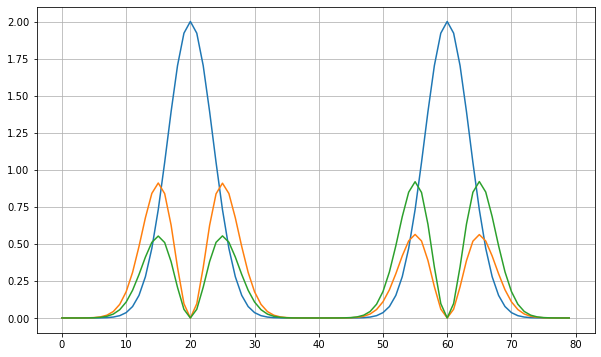

In [8]:
plt.figure(figsize=(10, 6))
plt.grid( lw=0.75)
for i in range(0, 3):
    alpha = v[:, indx[i]] @ phi
    plt.plot(np.abs(alpha)**2)

### Кулоновское взаимодествие

Рассмотрим еще один пример двухчастичной задачи
Пусть у нас имеется массивное ядро заряда Z, находящееся в начале координат и два электрона с координатами $x_1$ и $x_2$ соответственно, $x \in (0, a]$
Найдем волновую функцию данной системы в одномерном случае.

Ее Гамильтониан будет иметь следующий вид
$$H = -\frac{\hbar^2}{2m} \nabla^2_1 -\frac{\hbar^2}{2m} \nabla^2_2 - \frac{ze^2}{x_1} - \frac{ze^2}{x_2} + \frac{e^2}{|x_1 - x_2|},$$

где первые два слагаемых отвечают за кинетическую энергию электронов, третье и четвертое слагаемые описывают притяжение электронов к ядру, а последнее кулоновское отталкивание между электронами.
УШ выглядит следующим образом:

$$H(x_1, x_2) \psi(x_1, x_2) = E \psi(x_1, x_2)$$


Будем работать в таком же базисе что и для задачи с осцилляторами:
<!-- $$\psi(x_1, x_2) = \sum_{n} C_{n} \phi_n(x_1, x_2), $$ -->
$$\psi(x_1, x_2) = \sum_{i, j}\phi(x_{i}, x_{j} \psi(x_1, x_2) = \sum_{i, j}\delta(x_1 - x_i)\cdot \delta(x_2 - x_j) \psi(x_1, x_2)$$

Начальные параметры

In [17]:
a = 5
Z = 2
dx = 0.15
x = np.arange(dx, a, dx)
N = x.size

In [18]:
phi =np.zeros((N**2, 2*N))
for i in range(N):
    for j in range(N):
        phi[i*N +j, i] = 1
        phi[i*N +j, j + N] = 1

Соберем матрицу H

Кинетическая часть:

\begin{align}
    H_{mn}^{grad} &= -\frac{1}{2}\sum_{i, j = 0}^{N-1}\phi_{m}(x_i, x_j)(\nabla_{1}^{2} + \nabla_{2}^{2}) \phi_{n}(x_i, x_j) = \\
                  &= -\frac{1}{2}\sum_{i, j = 0}^{N-1}  \delta(x_2 - x_{jm}) \cdot\delta(x_1 - x_{im}) \frac{\partial^2}{\partial x_1^2} \delta(x_1 - x_{in})\cdot \delta(x_2 - x_{jn}) - \\
                  &-\frac{1}{2}\sum_{i, j = 0}^{N-1} \delta(x_1 - x_{im})\cdot \delta(x_2 - x_{jm}) \frac{\partial^2}{\partial x_2^2} \delta(x_2 - x_{jn}) \cdot \delta(x_1 - x_{in})
\end{align}

Притяжение к ядру:

\begin{align}
    H_{mn}^{kernel} &= -\sum_{i, j = 0}^{N-1}\phi_{m}(x_i, x_j)\left(\frac{Z}{x_i} + \frac{Z}{x_j}\right) \phi_{n}(x_i, x_j) = \\
                  &= -\sum_{i, j = 0}^{N-1} \delta(x_2 - x_{jm}) \cdot  \delta(x_1 - x_{im}) \frac{Z}{x_i} \delta(x_1 - x_{in})\cdot \delta(x_2 - x_{jn}) - \\
                  &-\sum_{i, j = 0 }^{N-1} \delta(x_1 - x_{im})\cdot \delta(x_2 - x_{jm}) \frac{Z}{x_j} \delta(x_2 - x_{jn}) \cdot \delta(x_1 - x_{in})
\end{align}

Кулоновское отталкивание:

\begin{align}
    H_{mn}^{сoulomb} &= \sum_{i, j}^{N-1}\phi_{m}(x_i, x_j)\left(\frac{1}{|x_i - x_j|}\right) \phi_{n}(x_i, x_j) = \left ( V(x_i, x_j) = \frac{1}{|x_i - x_j|}\right ) = \\
                  &= \sum_{j = 0}^{N-1} \delta(x_2 - x_{jm}) \sum_{i = 0}^{N-1} \left \{  \delta(x_1 - x_{im}) V(x_i, x_j) \delta(x_1 - x_{in}) \right \} \delta(x_2 - x_{jn}) = \\
                  &= \sum_{j = 0}^{N-1} \delta(x_2 - x_{jm}) V(x_j) \delta(x_2 - x_{jn})
\end{align}


In [26]:
V = np.zeros((N, N))
for i in  range(N):
    for j in range(N):
        V[i, j] = 1 / np.abs(x[i] - x[j]) if i != j else 1e03

In [27]:
H = np.zeros((N**2, N**2))
for m in tqdm.tqdm_notebook(range(N**2)):
# for m in tqdm.tqdm(range(N**2)):
    for n in range(N**2):
        H[m, n] -= 0.5 * phi[m, :N][1:N-1] @ np.diff(phi[n, :N], 2) / dx**2 * phi[m, N:] @ phi[n, N:]
        H[m, n] -= 0.5 * phi[m, N:][1:N-1] @ np.diff(phi[n, N:], 2) / dx**2 * phi[m, :N] @ phi[n, :N]
        
        H[m, n] -= Z * phi[m, :N] @ (phi[n, :N] / x) * phi[m, N:] @ phi[n, N:]
        H[m, n] -= Z * phi[m, N:] @ (phi[n, N:] / x) * phi[m, :N] @ phi[n, :N]
        
        H[m, n] += np.sum(phi[m, N:] * np.sum(phi[m, :N] * V * phi[n, :N], axis=1) * phi[n, N:])
        
        

<ipython-input-27-b23ab60a4f3e>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for m in tqdm.tqdm_notebook(range(N**2)):


In [28]:
e, v = np.linalg.eig(H)
indx = np.argsort(e)

In [41]:
alpha = v[:, indx[1]] @ phi
alpha1 = alpha[:N]
alpha2 = alpha[N:]

alpha1 /= np.linalg.norm(alpha1, 2)
alpha2 /= np.linalg.norm(alpha2, 2)

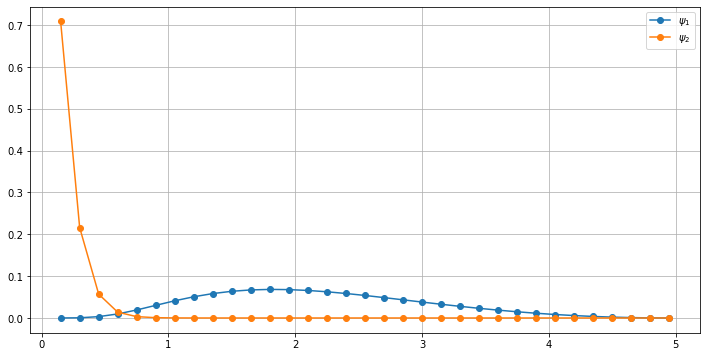

In [43]:
plt.figure(figsize=(12, 6))
plt.grid(lw=0.75)
plt.plot(x, np.abs(alpha1) ** 2, '-o', label='$\psi_1$')
plt.plot(x, np.abs(alpha2) ** 2, '-o', label='$\psi_2$')
plt.legend()

### Optional: Если хочется чуть побыстрее

In [31]:
import numba

In [32]:
@numba.njit()
def calc(H, N, phi, Z, V, x, dx):
    for m in range(N**2):
        for n in range(N**2):
            H[m, n] -= 0.5 * phi[m, :N][1:N-1] @ np.diff(phi[n, :N], 2) / dx**2 * phi[m, N:] @ phi[n, N:]
            H[m, n] -= 0.5 * phi[m, N:][1:N-1] @ np.diff(phi[n, N:], 2) / dx**2 * phi[m, :N] @ phi[n, :N]

            H[m, n] -= Z * phi[m, :N] @ (phi[n, :N] / x) * phi[m, N:] @ phi[n, N:]
            H[m, n] -= Z * phi[m, N:] @ (phi[n, N:] / x) * phi[m, :N] @ phi[n, :N]

            H[m, n] += np.sum(phi[m, N:] * np.sum(phi[m, :N] * V * phi[n, :N], axis=1) * phi[n, N:])      

In [33]:
import time 

In [34]:
H = np.zeros((N**2, N**2))
t1 = time.time()
calc(H, N, phi, Z, V, x, dx)
t2 = time.time() - t1
print(f'T = {t2:.2f} [s]')

T = 14.52 [s]


In [35]:
e, v = np.linalg.eig(H)
indx = np.argsort(e)

In [36]:
e[indx]

array([ -13.57496625,  -13.57496625,  -13.5290404 , ..., 1091.3962984 ,
       1091.59841041, 1091.80935318])

In [44]:
alpha = v[:, indx[1]] @ phi
alpha1 = alpha[:N]
alpha2 = alpha[N:]

alpha1 /= np.linalg.norm(alpha1, 2)
alpha2 /= np.linalg.norm(alpha2, 2)

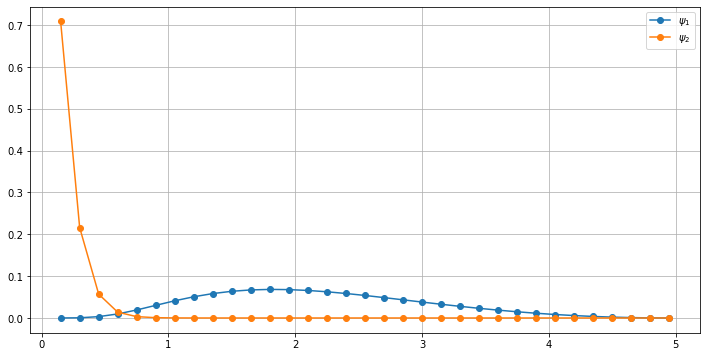

In [46]:
plt.figure(figsize=(12,6))
plt.grid(lw=0.75)
plt.plot(x, np.abs(alpha1) ** 2, '-o', label='$\psi_1$')
plt.plot(x, np.abs(alpha2) ** 2, '-o', label='$\psi_2$')
plt.legend()